In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN 
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans


In [2]:
pip uninstall python-dateutil

Uninstalling python-dateutil-2.8.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/dateutil/*
    /usr/local/lib/python3.6/dist-packages/python_dateutil-2.8.1.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled python-dateutil-2.8.1


In [3]:
pip install python-dateutil

     |████████████████████████████████| 235kB 17.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


**Using git download the movie repo**

In [4]:
! git clone https://github.com/divensambhwani/MovieLens-100K_Recommender-System.git  > /dev/null 2>&1

In [5]:
movies = pd.read_csv('/content/MovieLens-100K_Recommender-System/data/movies.csv')

print(movies.head(2))

ratings = pd.read_csv('/content/MovieLens-100K_Recommender-System/data/ratings.csv')
print(ratings.head(2))

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247


In [6]:
rating_data_all = ratings.drop(['timestamp'], axis=1)

In [7]:
rating_data_all.head(2)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


In [8]:
rating_data_all.shape
rating_data_all = rating_data_all.head(10000)

In [9]:
X = rating_data_all.iloc[:,:-1]
y = rating_data_all['rating'].values

**Preprocessing**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [11]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y)
true_labels[:5]

array([7, 7, 7, 9, 9])

**KMeans**

In [15]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

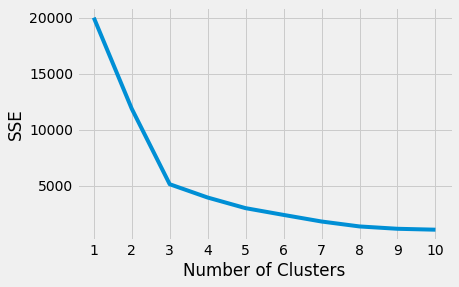

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
from sklearn.cluster import KMeans 

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [17]:
kmeans.inertia_

5118.199934712507

In [18]:
kmeans.labels_[:5]


array([1, 1, 1, 1, 1], dtype=int32)

In [19]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

print("silhouette score for KMeans: ", kmeans_silhouette)

silhouette score for KMeans:  0.58


In [20]:
range_eps = [0.01,0.1,0.2,0.3,0.4]
for i in range_eps:
  print("eps alue in "+str(i))
  db = DBSCAN(eps=i, min_samples=3).fit(scaled_features)
  core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
  labels = db.labels_
  silhoutte_average = silhouette_score(scaled_features ,labels)
  print(silhoutte_average)

eps alue in 0.01
0.2590987036015723
eps alue in 0.1
-0.18138587532990683
eps alue in 0.2
-0.018792790363334807
eps alue in 0.3
0.4696598278943309
eps alue in 0.4
0.5028855039190816


In [21]:
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm

dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [22]:
print("silhouette score for DBSCAN: ", dbscan_silhouette)

silhouette score for DBSCAN:  0.43


In [23]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(scaled_features, quantile=0.1)
ms = MeanShift(bandwidth).fit(scaled_features)
print(bandwidth)

0.5036958190794956


In [25]:
ms_silhouette = silhouette_score(
    scaled_features, ms.labels_
).round(2)

print("silhouette score for MeanShift: ",ms_silhouette)

silhouette score for MeanShift:  0.56


In [26]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(scaled_features)
labels = model.labels_

In [27]:
agglom_silhouette = silhouette_score(
    scaled_features, model.labels_
).round(2)

print("silhouette score for Agglomerative: ",agglom_silhouette)

silhouette score for Agglomerative:  0.53


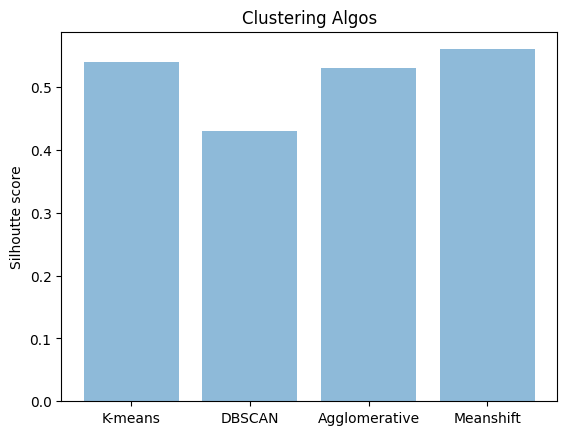

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('K-means', 'DBSCAN', 'Agglomerative', 'Meanshift')
y_pos = np.arange(len(objects))
performance = [kmeans_silhouette, dbscan_silhouette, agglom_silhouette, ms_silhouette]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Silhoutte score')
plt.title('Clustering Algos')

plt.show()

# **Graphs Analysis**

In [ ]:
movies = pd.read_csv('/content/MovieLens-100K_Recommender-System/data/movies.csv')

ratings = pd.read_csv('/content/MovieLens-100K_Recommender-System/data/ratings.csv')

In [ ]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    print(genre_ratings)
    genre_ratings.columns = column_names
    return genre_ratings

In [ ]:
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])


     rating  rating
1      4.31    4.22
2      4.50    3.88
3      0.50    4.20
4      3.38    2.83
5      3.09    2.50
..      ...     ...
606    3.74    3.56
607    3.52    3.25
608    2.89    3.30
609    3.20    3.00
610    3.73    3.66

[610 rows x 2 columns]


In [ ]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [ ]:
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

In [ ]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

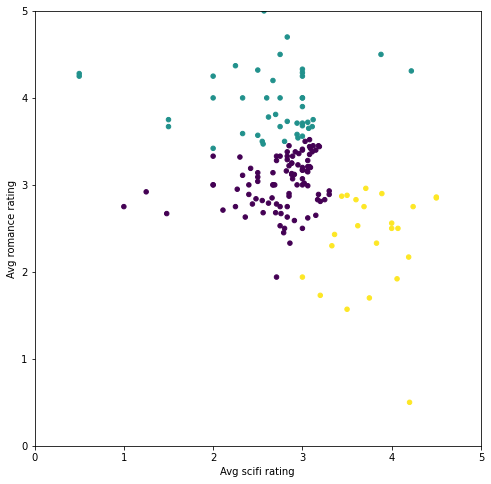

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans_1 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)


draw_clusters(biased_dataset, predictions)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


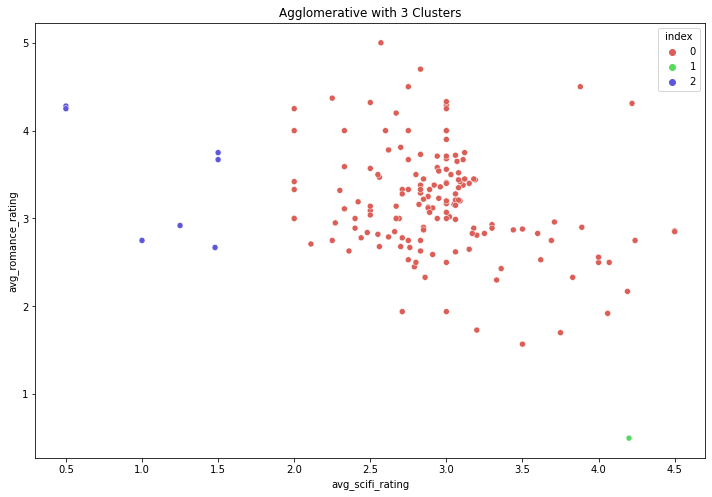

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

biased_dataset['index'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


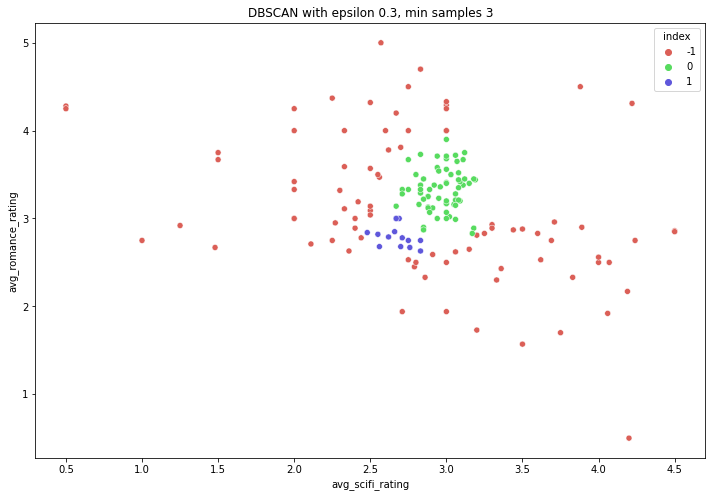

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.2, min_samples=12).fit(X)

biased_dataset['index'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 0.3, min samples 3')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


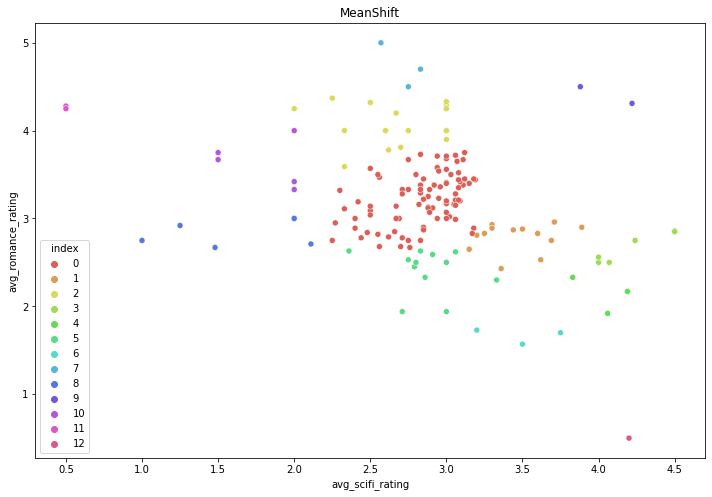

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

biased_dataset['index'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

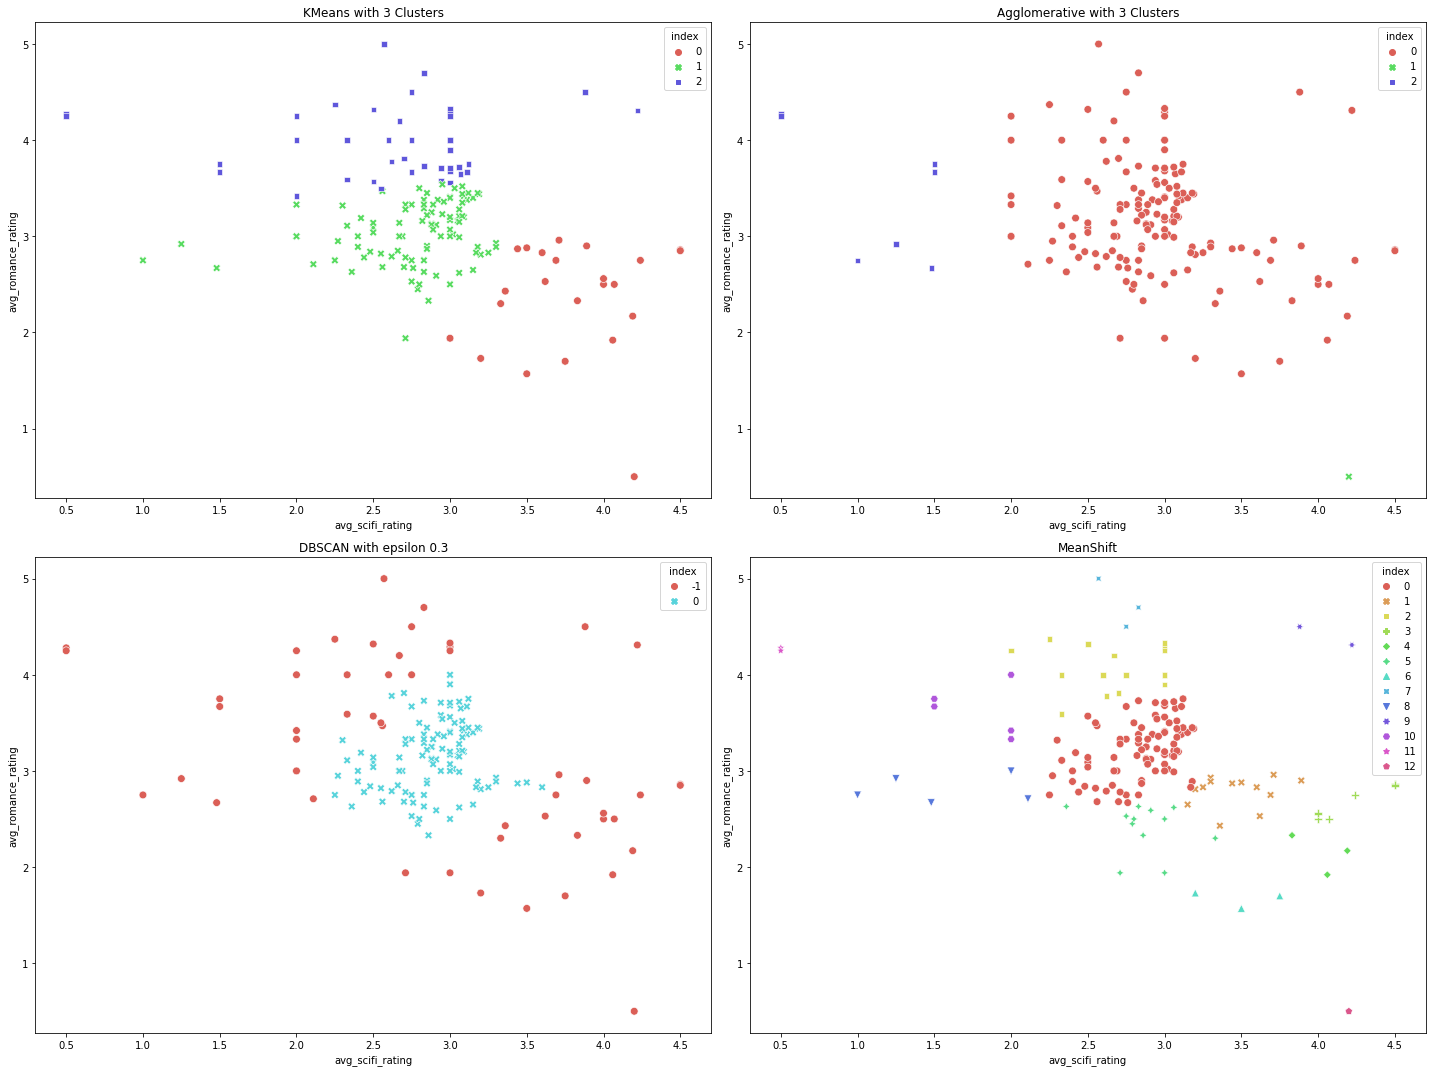

In [ ]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=3).fit(X)
biased_dataset['index'] = km5.labels_
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], style=biased_dataset['index'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('KMeans with 3 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
biased_dataset['index'] = agglom.labels_
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], style=biased_dataset['index'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('Agglomerative with 3 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=0.2, min_samples=6).fit(X)
biased_dataset['index'] = db.labels_
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], style=biased_dataset['index'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 0.3')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
biased_dataset['index'] = ms.labels_
sns.scatterplot(biased_dataset['avg_scifi_rating'], biased_dataset['avg_romance_rating'], hue=biased_dataset['index'], style=biased_dataset['index'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()